# Decision Tree Learning and Cross-validation




## Scikit-learn

Scikit-learn, is a powerful open-source machine learning library for Python. Take a look at the main modules in scikit-learn: 
https://scikit-learn.org/stable/index.html

In this practical, we are going to use scikit-learn to build decision trees and use cross-validation to evaluate the models. 

The best source to study Scikit-learn is its documentation, where you can find tons of examples, and it's often useful to read the documentation for the key parameters and its usage for different classes and methods. 


## Iris data
We will start to play with the example on Scikit-learn: the famous Iris dataset. 

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_iris
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
# Load data
iris = load_iris()
# Here is the description of the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Plot the decision surface of a decision tree 

Plot the decision surface of a decision tree trained on pairs of features of the iris dataset - example from Scikit-learn.

See decision tree <tree> for more information on the estimator.

Below for each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.



Automatically created module for IPython interactive environment


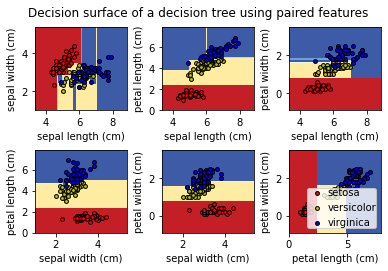

<Figure size 432x288 with 0 Axes>

In [4]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()

plt.show()

## Question 1
Take a look at the decision surface plots, which variables do you think will be most useful or least useful for predicting the class labels (the type of iris)?

- petal length 
- petal width 
- sepal length 

## Visualise the decision tree

We now plot the tree structure of a model built on all of the features. 

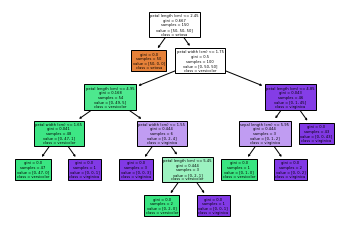

In [5]:
labels = iris.feature_names
clf = DecisionTreeClassifier().fit(iris.data, iris.target)

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
tree.plot_tree(clf,feature_names = fn, class_names=cn,filled = True);


## Question 2
Look at the above tree structure, have all the variables been selected for prediction? 
Does the variables selected by the tree in line with your answers in Question 1? 

- first splits on petal length
- then splits on petal width 
- i said the best 2 variables to split on were petal length and then petal width 


The Decision tree above shows a Gini index which is used to select the best attributte to split the tree on. You can see more the mathematicl formula for it [here](https://scikit-learn.org/stable/modules/tree.html)

For more info about the classifier and it's parameters and methods, you can check [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

##  Exercie 1
Step 1. Change the default criterion for decision tree from 'gini' to 'entropy' to use information gain instead. Plot the tree again, can you find any difference between the trees induced using two different criteria?

Step 2. Reduce the tree size by limit the max_depth to 3. Which one is better in your opinion (by intuition): the shallower tree or the more complex one? 


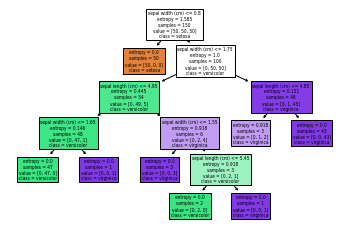

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf2 = DecisionTreeClassifier(criterion="entropy").fit(X, y)
    
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
tree.plot_tree(clf2,feature_names = fn, class_names=cn,filled = True);

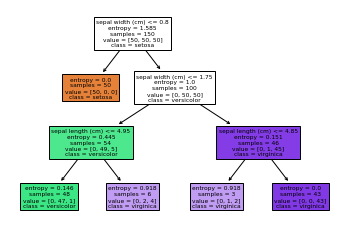

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3).fit(X, y)
    
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
tree.plot_tree(clf2,feature_names = fn, class_names=cn,filled = True);

Intuitivly the more complex tree is the better tree as the leaf nodes all have lower entropy meaning that they have a higher information gain which is better. 

## Question 3
What are the parameters in DecisionClassifier that you can change to control the complexity (size) of the tree? 

- criterion: the function which measures the quality of a split. Different criteria are “gini” for the Gini impurity and “log_loss” and “entropy”
- splitter: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random”
- max depth: The maximum depth the tree will go, if none then the tree will go until all terminal leaves are found
- min_samples_split: The minimum number of samples required to split an internal node
- min_samples_leaf: Minimum number of samples required to be a leaf node
- min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights required to be at a leaf node
- max_features: The number of features to consider when looking for the best split

## Cross-validation

It's hard to say which model is better by just visualising the tree. Next We perform cross-validation to evaluate the performance of the models. 


### K-fold cross-validation
We use [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function in scikit-learn for k-fold cross-validation. 

In [8]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=2)
scores = cross_validate(clf, iris.data, iris.target, cv=10)
print(scores['test_score'])
print(np.mean(scores['test_score']), "+/-", np.std(scores['test_score']))

[0.93333333 0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.86666667 1.         1.         1.        ]
0.9466666666666667 +/- 0.04988876515698587


### Exercise

Check the 10-fold cross-validation performance for  different settings of the decision tree classifier: e.g. with various max_length. 

In [9]:
# Change the tree complexity in Decision Classifier, and get the K-fold cross-validation performance
# Your code
depths = [2, 3, 4, 5]
for depth in depths:
    clf_maxdepth = DecisionTreeClassifier(max_depth=depth).fit(X, y)
    scores_maxdepth = cross_validate(clf_maxdepth, iris.data, iris.target, cv=10)
    print("Max_depth = %i: %f +/- %f" %(depth, np.mean(scores_maxdepth['test_score']), np.std(scores_maxdepth['test_score'])))

Max_depth = 2: 0.953333 +/- 0.052068
Max_depth = 3: 0.960000 +/- 0.032660
Max_depth = 4: 0.960000 +/- 0.044222
Max_depth = 5: 0.953333 +/- 0.042687


### Hold-out cross-validation
We can also split the data into training and test set using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split), and use [classification_report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) to obtain a performance report given the predicted and true target values. 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = iris.data
y = iris.target

# Split the data into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# training the classifier with max depth of 5
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Just get a classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.83      0.91        12
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



## Titanic Dataset

Next you will revisit the Titanic dataset that we have explored in Practical0-2. 

Your task is to develop decision tree models using all the development data, and then use 5 fold cross-validation to evaluate the model peroformance. 

In [11]:
import pandas as pd
url = "https://raw.githubusercontent.com/ashishpatel26/Titanic-Machine-Learning-from-Disaster/master/input/train.csv"
data = pd.read_csv(url, sep=",")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Step 1. Build a tree using all the devleopment data (i.e. the dataframe data in this case)
# Your code here
# explore data NaNs 
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#drop cabin column with 687 NaNs and create mean for Age to fill in Nans
new_data = data.drop(['Cabin'], axis=1)
age_mean = new_data['Age'].mean()
new_data['Age'] = new_data['Age'].fillna(age_mean)

In [14]:
#map Embarked and sex columns
from scipy.stats import mode

# Fill in missing values with mode for discrete variables
mode_embarked = mode(new_data['Embarked'])[0][0]
new_data['Embarked'] = new_data['Embarked'].fillna(mode_embarked)

#map sex to 1 or 0 for each gender
new_data['gender'] = new_data['Sex'].map({'female': 0, 'male': 1}).astype(int)

new_data = pd.concat([new_data, pd.get_dummies(new_data['Embarked'], prefix='Embarked')], axis=1)

#dummy variables for sex column 
pd.get_dummies(new_data["Sex"], prefix="Sex").head(5)

new_data = pd.concat([new_data, pd.get_dummies(new_data["Sex"], prefix= "Sex")], axis=1)


#drop name 
new_data_noName = new_data.drop(["Name", "Ticket", "Sex", "Embarked"], axis = 1)

titanicY = new_data_noName['Survived']
titanicX = new_data_noName.drop(["Survived"], axis=1)

In [15]:
# build the tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth = 5).fit(titanicX, titanicY)

[Text(159.38617021276596, 199.32, 'gender <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = Survived'),
 Text(83.7, 163.07999999999998, "Pclass <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = Didn't survive"),
 Text(32.05531914893617, 126.83999999999999, "Age <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = Didn't survive"),
 Text(14.246808510638298, 90.6, 'PassengerId <= 414.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Survived'),
 Text(7.123404255319149, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Survived'),
 Text(21.370212765957447, 54.359999999999985, "gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Didn't survive"),
 Text(49.86382978723404, 90.6, "Fare <= 28.856\ngini = 0.091\nsamples = 168\nvalue = [8, 160]\nclass = Didn't survive"),
 Text(35.61702127659574, 54.359999999999985, "Fare <= 28.231\ngini = 0.182\nsamples = 69\nvalue = [7, 62]\nclass = Didn't survive"),
 Text(28.493617021276595, 18.1199999999

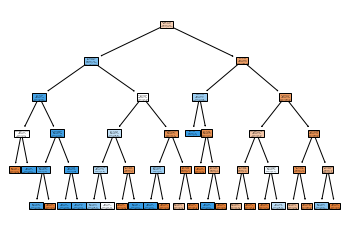

In [17]:
# Step 2. Visualise the tree
# Your code here
from sklearn.tree import plot_tree

titan_feats = titanicX.columns
titan_classes = ["Survived", "Didn't survive"]

tree.plot_tree(decision_tree,feature_names = titan_feats, class_names= titan_classes ,filled = True)

In [18]:
# Step 3. Evaluate the model performance using 5 fold cross-validation
# Your code here

import numpy as np
from sklearn.model_selection import cross_validate
scores = cross_validate(decision_tree, titanicX, titanicY, cv=5)
print(scores['test_score'])
print(np.mean(scores['test_score']), "+/-", np.std(scores['test_score']))

[0.68156425 0.80898876 0.80898876 0.78089888 0.84831461]
0.7857510514092022 +/- 0.05634290566901899


In [19]:
# Step 4. Train and valuate the model with hold-out cross-validation
# Your code here

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(titanicX, titanicY, test_size=0.2)

# training the classifier on max depth of 5
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Just get a classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       108
           1       0.80      0.69      0.74        71

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



## Question for thoughts: 
Which variables have been used or selected by the decisionn tree model? 
Decision tree algorithm can be used for selecting useful features for model fitting. Are there any pitfalls here if features are selected just based on a single decision tree?